In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from scipy.stats import skew

In [29]:
data= pd.read_csv('/content/sales_data_with_discounts.csv')
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [30]:
data.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [32]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [33]:
print(data["Volume"].mean())
print(data["Volume"].median())
print(data["Volume"].mode())
print(data["Volume"].std())

5.066666666666666
4.0
0    3
Name: Volume, dtype: int64
4.231602391213923


In [34]:
print(data["Avg Price"].mean())
print(data["Avg Price"].median())
print(data["Avg Price"].mode())
print(data["Avg Price"].std())

10453.433333333332
1450.0
0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64
18079.90483993647


In [35]:
print(data["Total Sales Value"].mean())
print(data["Total Sales Value"].median())
print(data["Total Sales Value"].mode())
print(data["Total Sales Value"].std())

33812.83555555555
5700.0
0    24300
Name: Total Sales Value, dtype: int64
50535.07417255325


In [36]:
print(data["Discount Rate (%)"].mean())
print(data["Discount Rate (%)"].median())
print(data["Discount Rate (%)"].mode())
print(data["Discount Rate (%)"].std())

15.155241895330914
16.57776564929597
0       5.007822
1       5.055218
2       5.059801
3       5.072124
4       5.084108
         ...    
445    19.940610
446    19.965340
447    19.976879
448    19.982257
449    19.992407
Name: Discount Rate (%), Length: 450, dtype: float64
4.22060215332551


In [37]:
print(data["Discount Amount"].mean())
print(data["Discount Amount"].median())
print(data["Discount Amount"].mode())
print(data["Discount Amount"].std())

3346.499424342415
988.9337332382784
0         69.177942
1         73.025199
2         93.649161
3         94.682735
4        102.705757
           ...     
445    17900.983733
446    21153.498820
447    21496.675367
448    25328.224204
449    25738.022194
Name: Discount Amount, Length: 450, dtype: float64
4509.902963353998


In [38]:
print(data["Net Sales Value"].mean())
print(data["Net Sales Value"].median())
print(data["Net Sales Value"].mode())
print(data["Net Sales Value"].std())

30466.336131270138
4677.788059301853
0         326.974801
1         330.822058
2         466.350839
3         485.317265
4         496.607104
           ...      
445    162603.186379
446    163915.971000
447    163967.080070
448    166263.161348
449    179507.479049
Name: Net Sales Value, Length: 450, dtype: float64
46358.65662406695


In [39]:
df=data[["Volume",	"Avg Price",	"Total Sales Value",	"Discount Rate (%)",	"Discount Amount",	"Net Sales Value"]]

In [40]:
newdf=data.copy()

In [41]:
newdf.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [42]:
newdf.drop(columns=["Date"], inplace=True)

In [43]:
newdf.groupby(["Day","Model","BU","SKU","City","Brand"]).mean()


Volume  Avg Price  \
Day       Model          BU        SKU City Brand                       
Friday    Babaji Cream   FMCG      F05 C    Babaji     7.5      290.0   
          Babaji Oil     FMCG      F01 C    Babaji    30.0      400.0   
          Babaji Shampoo FMCG      F04 C    Babaji     6.5      465.0   
          Gear BB Cream  FMCG      F10 C    Gear       2.0     1099.0   
          Gear Cream     FMCG      F08 C    Gear       1.5      400.0   
...                                                    ...        ...   
Wednesday W-Lounge       Lifestyle L08 C    Viva       3.0     1600.0   
          W-Western      Lifestyle L07 C    Viva       4.0     2600.0   
          YM-98          Mobiles   M05 C    YouM       4.0     8100.0   
          YM-99          Mobiles   M03 C    YouM       6.5    16100.0   
          YM-99 Plus     Mobiles   M04 C    YouM       3.5    20100.0   

                                                    Total Sales Value  \
Day       Model          BU        SKU City Brand                       
Friday    Babaji Cream   FMCG      F05 C    Babaji             2175.0   
          Babaji Oil     FMCG      F01 C    Babaji            12000.0   
          Babaji Shampoo FMCG      F04 C    Babaji             3022.5   
          Gear BB Cream  FMCG      F10 C    Gear               2198.0   
          Gear Cream     FMCG      F08 C    Gear                600.0   
...                                                               ...   
Wednesday W-Lounge       Lifestyle L08 C    Viva               4800.0   
          W-Western      Lifestyle L07 C    Viva              10400.0   
          YM-98          Mobiles   M05 C    YouM              32400.0   
          YM-99          Mobiles   M03 C    YouM             104650.0   
          YM-99 Plus     Mobiles   M04 C    YouM              70350.0   

                                                    Discount Rate (%)  \
Day       Model          BU        SKU City Brand                       
Friday    Babaji Cream   FMCG      F05 C    Babaji          18.556866   
          Babaji Oil     FMCG      F01 C    Babaji          18.536004   
          Babaji Shampoo FMCG      F04 C    Babaji          16.835623   
          Gear BB Cream  FMCG      F10 C    Gear            17.811225   
          Gear Cream     FMCG      F08 C    Gear            16.514105   
...                                                               ...   
Wednesday W-Lounge       Lifestyle L08 C    Viva            19.681923   
          W-Western      Lifestyle L07 C    Viva            18.098083   
          YM-98          Mobiles   M05 C    YouM            17.679209   
          YM-99          Mobiles   M03 C    YouM             9.296982   
          YM-99 Plus     Mobiles   M04 C    YouM             7.202022   

                                                    Discount Amount  \
Day       Model          BU        SKU City Brand                     
Friday    Babaji Cream   FMCG      F05 C    Babaji       405.439004   
          Babaji Oil     FMCG      F01 C    Babaji      2219.712222   
          Babaji Shampoo FMCG      F04 C    Babaji       514.262668   
          Gear BB Cream  FMCG      F10 C    Gear         398.674245   
          Gear Cream     FMCG      F08 C    Gear          97.523872   
...                                                             ...   
Wednesday W-Lounge       Lifestyle L08 C    Viva         944.732290   
          W-Western      Lifestyle L07 C    Viva        1882.200608   
          YM-98          Mobiles   M05 C    YouM        5728.063637   
          YM-99          Mobiles   M03 C    YouM        9684.559197   
          YM-99 Plus     Mobiles   M04 C    YouM        5145.694648   

                                                    Net Sales Value  
Day       Model          BU        SKU City Brand                    
Friday    Babaji Cream   FMCG      F05 C    Babaji      1769.560996  
          Babaji Oil     FMCG      F01 C    Babaji      9780.287778 

In [44]:
newdf=data.copy()

In [45]:
newdf.drop(columns=["City"], inplace=True)

In [46]:
newdf.groupby(["Date","Day","Model","BU","SKU","Brand"]).mean()

Volume  Avg Price  \
Date       Day      Model          BU        SKU Brand                       
01-04-2021 Thursday Babaji Cream   FMCG      F05 Babaji     5.0      290.0   
                    Babaji Oil     FMCG      F01 Babaji    13.0      400.0   
                    Babaji Shampoo FMCG      F04 Babaji     9.0      465.0   
                    Gear BB Cream  FMCG      F10 Gear       4.0     1099.0   
                    Gear Cream     FMCG      F08 Gear       3.0      400.0   
...                                                         ...        ...   
15-04-2021 Thursday W-Lounge       Lifestyle L08 Viva       2.0     1600.0   
                    W-Western      Lifestyle L07 Viva       6.0     2600.0   
                    YM-98          Mobiles   M05 YouM       3.0     8100.0   
                    YM-99          Mobiles   M03 YouM       4.0    16100.0   
                    YM-99 Plus     Mobiles   M04 YouM       5.0    20100.0   

                                                         Total Sales Value  \
Date       Day      Model          BU        SKU Brand                       
01-04-2021 Thursday Babaji Cream   FMCG      F05 Babaji             1450.0   
                    Babaji Oil     FMCG      F01 Babaji             5200.0   
                    Babaji Shampoo FMCG      F04 Babaji             4185.0   
                    Gear BB Cream  FMCG      F10 Gear               4396.0   
                    Gear Cream     FMCG      F08 Gear               1200.0   
...                                                                    ...   
15-04-2021 Thursday W-Lounge       Lifestyle L08 Viva               3200.0   
                    W-Western      Lifestyle L07 Viva              15600.0   
                    YM-98          Mobiles   M05 YouM              24300.0   
                    YM-99          Mobiles   M03 YouM              64400.0   
                    YM-99 Plus     Mobiles   M04 YouM             100500.0   

                                                         Discount Rate (%)  \
Date       Day      Model          BU        SKU Brand                       
01-04-2021 Thursday Babaji Cream   FMCG      F05 Babaji          15.516591   
                    Babaji Oil     FMCG      F01 Babaji          18.869242   
                    Babaji Shampoo FMCG      F04 Babaji          18.509508   
                    Gear BB Cream  FMCG      F10 Gear            16.735954   
                    Gear Cream     FMCG      F08 Gear            17.506967   
...                                                                    ...   
15-04-2021 Thursday W-Lounge       Lifestyle L08 Viva            18.965550   
                    W-Western      Lifestyle L07 Viva            17.057027   
                    YM-98          Mobiles   M05 YouM            17.250383   
                    YM-99          Mobiles   M03 YouM             5.485157   
                    YM-99 Plus     Mobiles   M04 YouM             5.466379   

                                                         Discount Amount  \
Date       Day      Model          BU        SKU Brand                     
01-04-2021 Thursday Babaji Cream   FMCG      F05 Babaji       224.990564   
                    Babaji Oil     FMCG      F01 Babaji       981.200566   
                    Babaji Shampoo FMCG      F04 Babaji       774.622896   
                    Gear BB Cream  FMCG      F10 Gear         735.712524   
                    Gear Cream     FMCG      F08 Gear         210.083607   
...                                                                  ...   
15-04-2021 Thursday W-Lounge       Lifestyle L08 Viva         606.897606   
                    W-Western      Lifestyle L07 Viva        2660.896242   
                    YM-98          Mobiles   M05 YouM        4191.842998   
                    YM-99          Mobiles   M03 YouM        3532.440896   
                    YM-99 Plus     Mobiles   M04 YouM        5493.711232   

                       

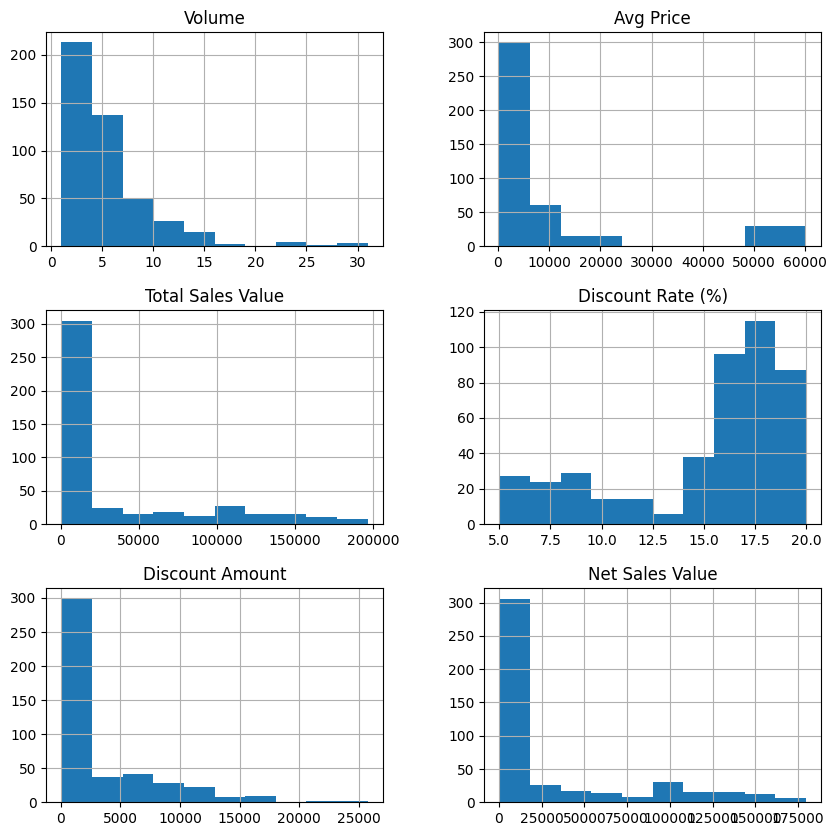

In [47]:
data.hist(figsize=(10,10))
plt.show()

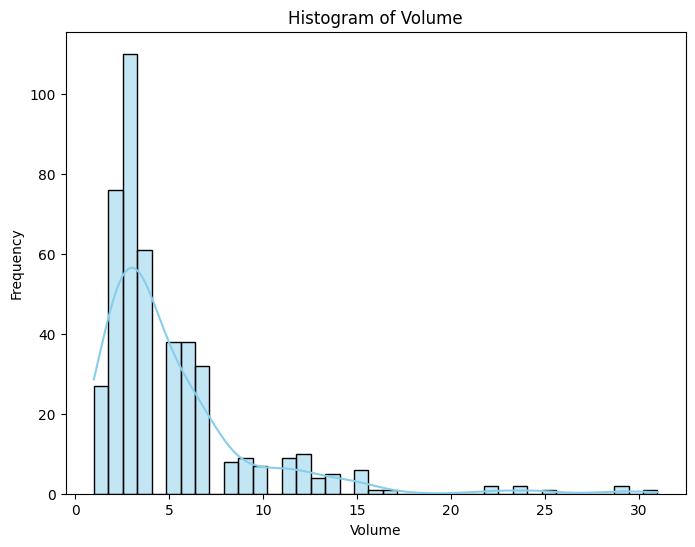

skewness 2.7226094367513567
Outliers in Volume: 0      15
10     13
30     11
40     29
50     13
70     24
71     14
80     12
100    25
101    15
102    11
130    15
140    14
161    12
170    12
180    12
190    22
192    11
193    11
200    12
201    12
210    14
221    11
222    11
240    15
250    31
251    12
260    16
280    24
281    11
282    12
300    12
310    22
312    11
320    13
340    15
350    12
370    14
371    14
390    11
400    29
410    15
420    13
431    17
Name: Volume, dtype: int64
The distribution of Volume is highly skewed.


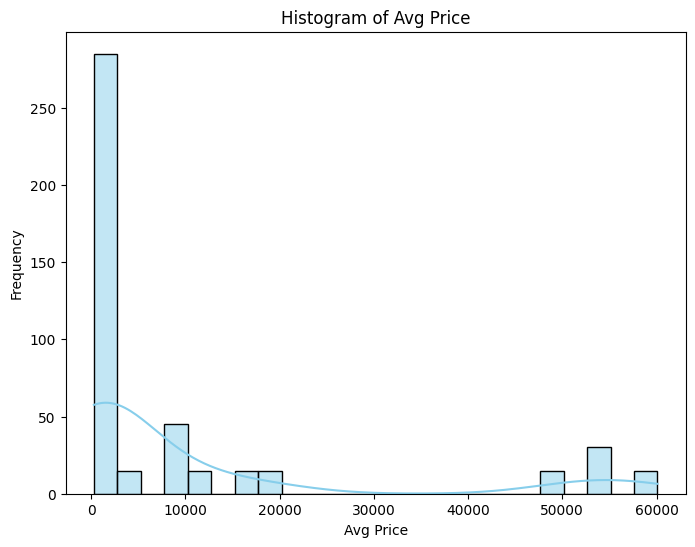

skewness 1.9025042657554003
Outliers in Avg Price: 6      49100
7      54100
8      55100
9      60100
36     49100
37     54100
38     55100
39     60100
66     49100
67     54100
68     55100
69     60100
96     49100
97     54100
98     55100
99     60100
126    49100
127    54100
128    55100
129    60100
156    49100
157    54100
158    55100
159    60100
186    49100
187    54100
188    55100
189    60100
216    49100
217    54100
218    55100
219    60100
246    49100
247    54100
248    55100
249    60100
276    49100
277    54100
278    55100
279    60100
306    49100
307    54100
308    55100
309    60100
336    49100
337    54100
338    55100
339    60100
366    49100
367    54100
368    55100
369    60100
396    49100
397    54100
398    55100
399    60100
426    49100
427    54100
428    55100
429    60100
Name: Avg Price, dtype: int64
The distribution of Avg Price is highly skewed.


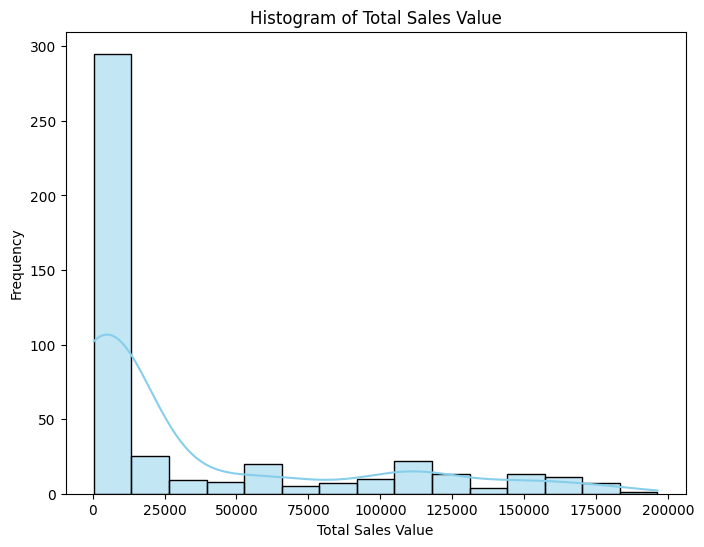

skewness 1.529608815284332
Outliers in Total Sales Value: 0      181500
6      147300
9      180300
30     133100
36     147300
38     165300
39     180300
66     196400
96     147300
126    147300
127    162300
157    162300
180    145200
186    147300
187    162300
188    165300
189    180300
210    169400
216    147300
240    181500
243    140700
246    147300
278    165300
300    145200
306    147300
308    165300
309    180300
338    165300
339    180300
363    140700
366    147300
390    133100
396    147300
420    157300
426    147300
428    165300
Name: Total Sales Value, dtype: int64
The distribution of Total Sales Value is highly skewed.


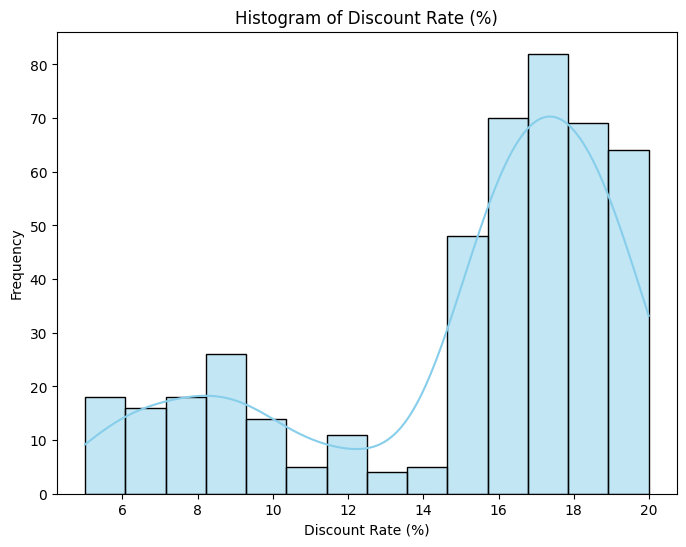

skewness -1.0587501046709231
Outliers in Discount Rate (%): 3      6.935385
7      5.553719
8      7.410104
33     6.214888
36     5.252113
67     7.621791
69     5.007822
93     5.870671
98     6.710454
99     6.095201
127    5.935084
128    7.584591
152    7.732667
153    7.233847
156    5.420507
157    6.849976
159    7.256696
187    7.178726
212    7.679386
213    5.794802
218    5.059801
242    6.858255
243    7.208363
246    7.341874
248    6.473305
249    6.439920
273    7.421326
278    6.268914
279    6.819111
302    6.170398
303    5.072124
307    6.106931
308    6.508719
336    6.066192
338    5.084108
368    6.326892
393    6.415230
397    5.055218
398    5.411802
399    5.511042
422    5.485157
423    5.466379
426    6.008200
427    6.642595
428    5.425911
Name: Discount Rate (%), dtype: float64
The distribution of Discount Rate (%) is highly skewed.


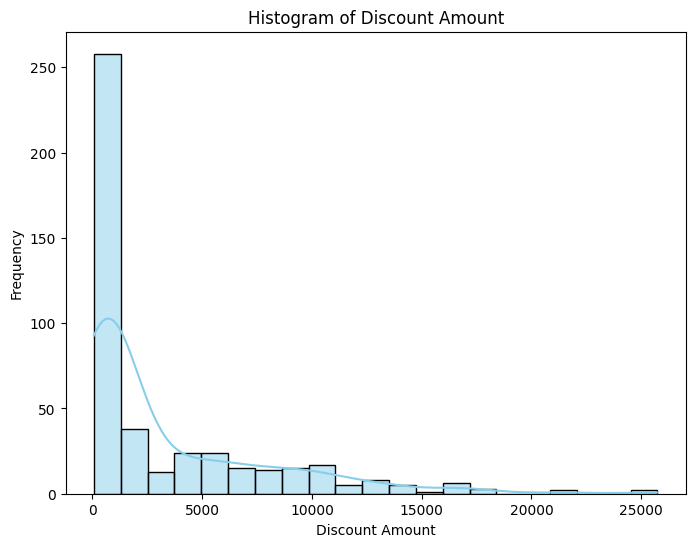

skewness 1.9066550278687509
Outliers in Discount Amount: 0      21153.498820
6      13594.039719
9      17900.983733
30     17445.603828
38     13951.660194
39     16384.029009
66     16892.520951
90     15214.643324
96     12622.503658
180    17178.331859
186    12753.565958
188    13999.938499
189    17696.813621
210    25328.224204
216    13608.238319
240    25738.022194
300    21496.675367
309    16332.919930
339    14036.838652
363    12734.009012
366    13275.780741
390    16218.594720
396    13382.227333
420    15984.732281
Name: Discount Amount, dtype: float64
The distribution of Discount Amount is highly skewed.


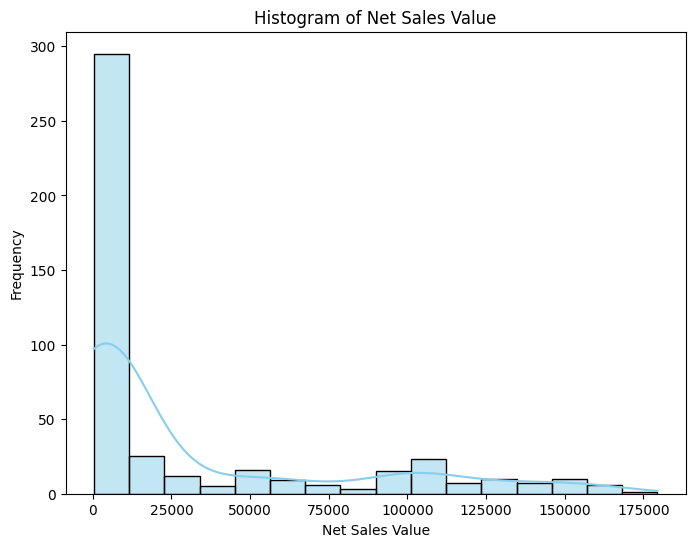

skewness 1.535680921975744
Outliers in Net Sales Value: 0      160346.501180
6      133705.960281
9      162399.016267
36     139563.638215
38     151348.339806
39     163915.971000
66     179507.479049
96     134677.496342
126    134731.954625
127    152667.358354
157    151182.489533
180    128021.668141
186    134546.434042
187    150648.927866
188    151300.061501
189    162603.186379
210    144071.775796
216    133691.761681
240    155761.977806
243    130557.833327
246    136485.419091
278    154937.485475
300    123703.324633
306    134934.946692
308    154541.087365
309    163967.080070
338    156895.968772
339    166263.161348
363    127965.990988
366    134024.219259
390    116881.405280
396    133917.772667
420    141315.267719
426    138449.922039
428    156330.969890
Name: Net Sales Value, dtype: float64
The distribution of Net Sales Value is highly skewed.


In [48]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
for columns in numerical_cols:

  #  HISTOGRAM PLOT FOR EACH NUMERICAL COLUMN
  plt.figure(figsize=(8, 6))
  sns.histplot(df[columns], kde=True, color='skyblue')
  plt.title(f'Histogram of {columns}')
  plt.xlabel(columns)
  plt.ylabel('Frequency')
  plt.show()

  #  SKEWNESS & OUTLINERS
  skewness = skew(data[columns])
  print("skewness" ,skewness)

  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)][columns]

  if len(outliers) > 0:
      print(f'Outliers in {columns}: {outliers}')
  else:
      print(f'No outliers found in {columns}')

  # PROVIDING INFRENCES FOR OUTLINERS

  if abs(skewness) > 1:
      print(f'The distribution of {columns} is highly skewed.')
  elif abs(skewness) > 0.5:
      print(f'The distribution of {columns} is moderately skewed.')
  else:
      print(f'The distribution of {columns} is approximately symmetric.')


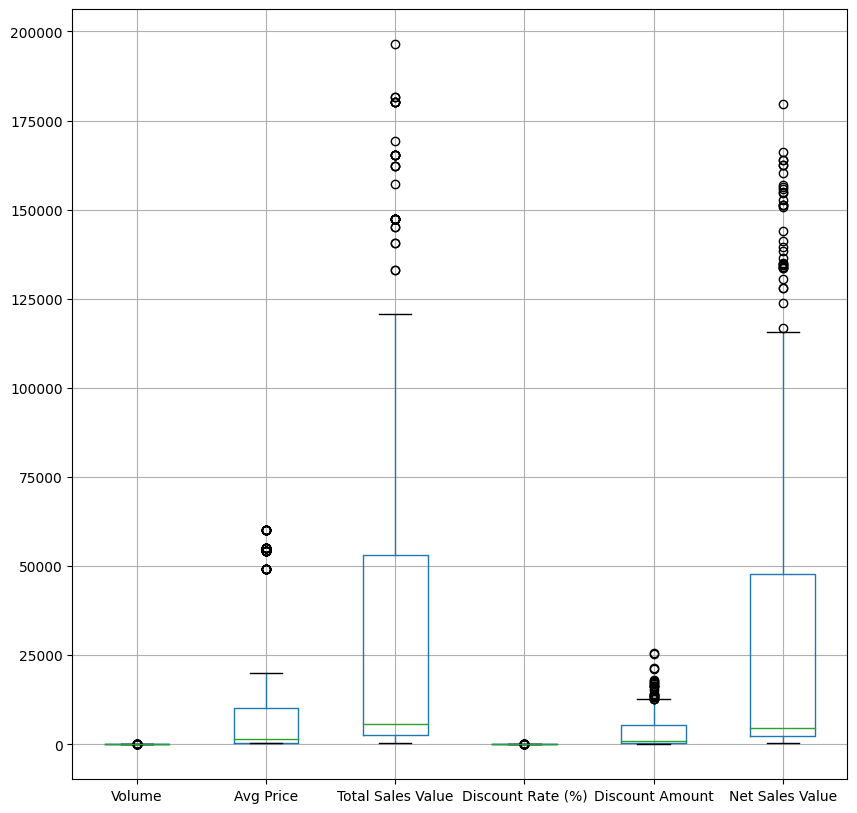

In [49]:
data.boxplot(figsize=(10,10))
plt.show()

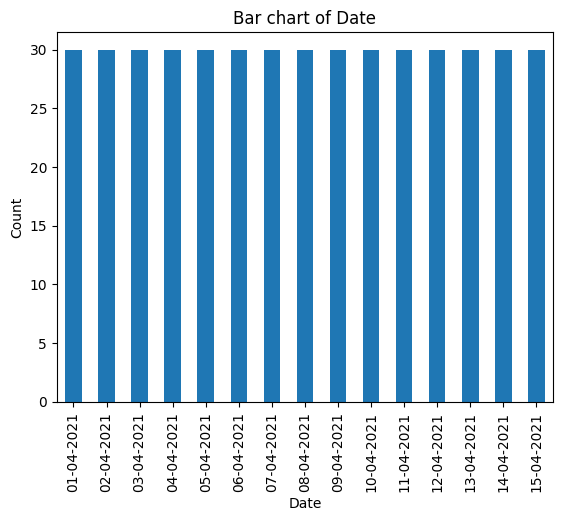

In [50]:
data["Date"].value_counts().plot(kind='bar')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Bar chart of Date")
plt.show()

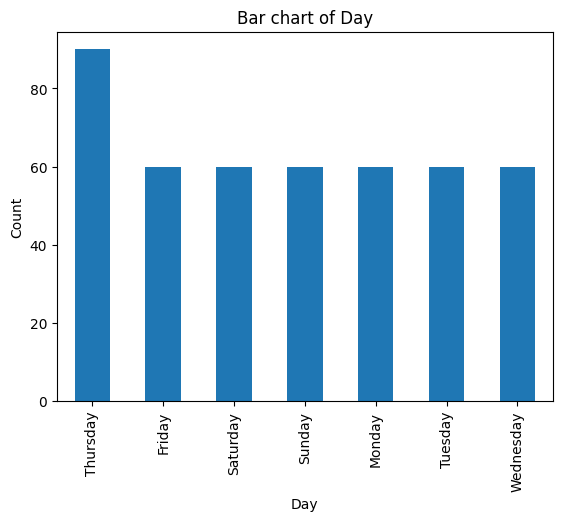

In [51]:
data["Day"].value_counts().plot(kind='bar')
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Bar chart of Day")
plt.show()

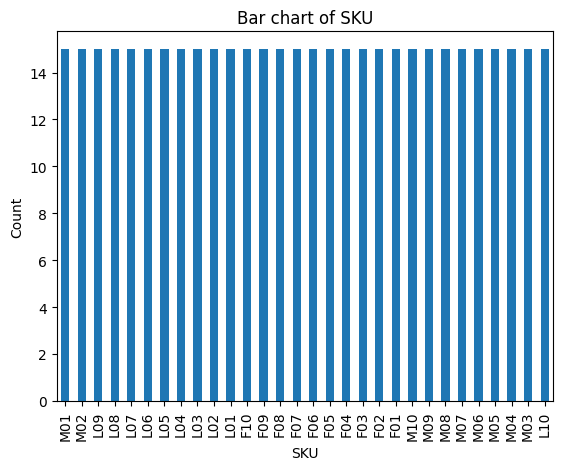

In [52]:
data["SKU"].value_counts().plot(kind='bar')
plt.xlabel("SKU")
plt.ylabel("Count")
plt.title("Bar chart of SKU")
plt.show()

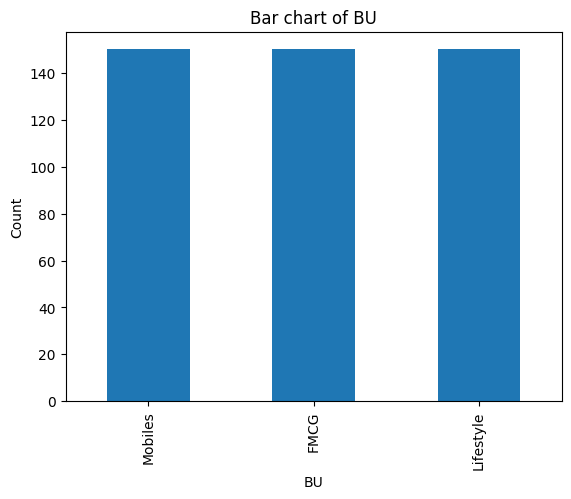

In [53]:
data["BU"].value_counts().plot(kind='bar')
plt.xlabel("BU")
plt.ylabel("Count")
plt.title("Bar chart of BU")
plt.show()

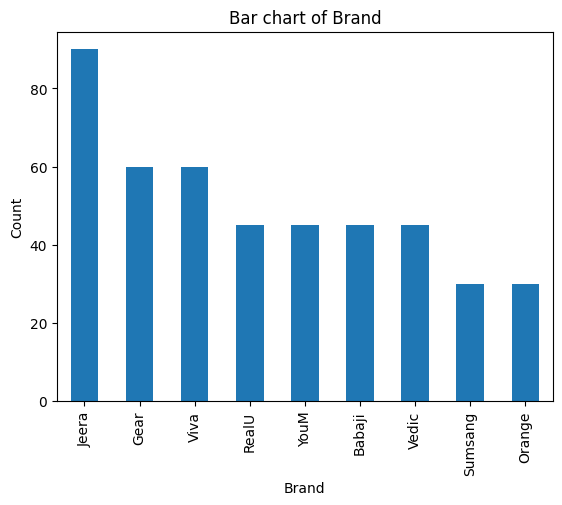

In [54]:
data["Brand"].value_counts().plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Bar chart of Brand")
plt.show()

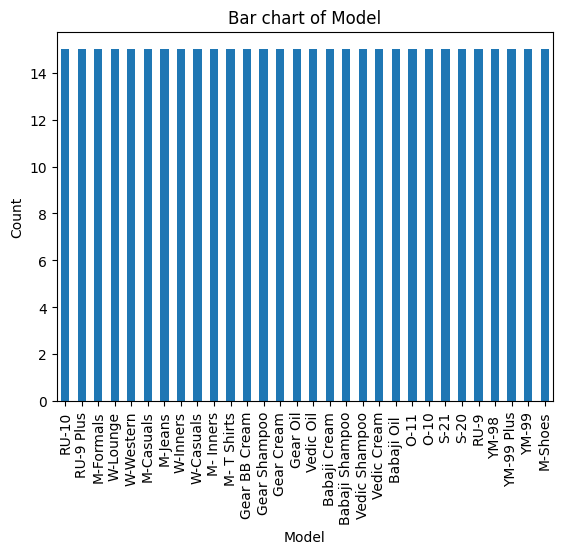

In [55]:
data["Model"].value_counts().plot(kind='bar')
plt.xlabel("Model")
plt.ylabel("Count")
plt.title("Bar chart of Model")
plt.show()

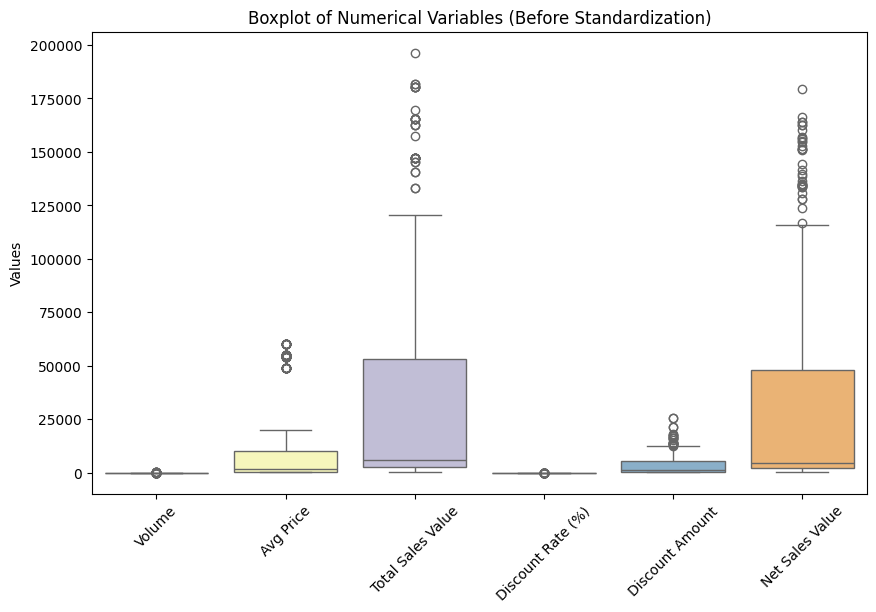

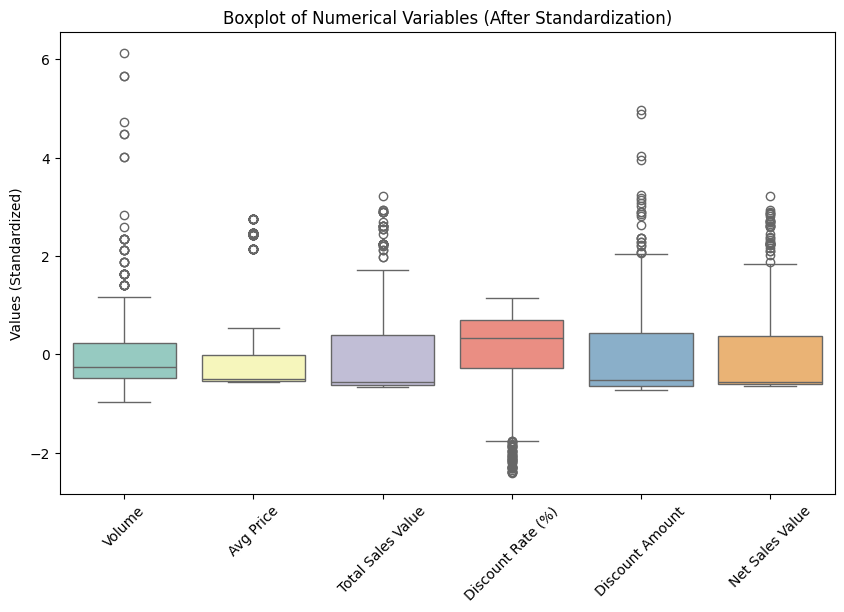

In [56]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Before Standardization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], orient='v', palette='Set3')
plt.title('Boxplot of Numerical Variables (Before Standardization)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


# Standardize the numerical columns
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[numerical_cols])
df_standardized = pd.DataFrame(df_standardized, columns=numerical_cols)


# After Standardization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_standardized, orient='v', palette='Set3')
plt.title('Boxplot of Numerical Variables (After Standardization)')
plt.ylabel('Values (Standardized)')
plt.xticks(rotation=45)
plt.show()